In [1]:
def image_convert(filename,Originalfolder,FinalFolder):
    import matplotlib.image as mpimg
    if Originalfolder == '':
        img=Image.open(os.path.join(Originalfolder, filename))
        img = img.convert("L")
        img = img.resize((256, 256))
        img = np.array(img)
        return img
    else:
        img=Image.open(os.path.join(Originalfolder, filename))
        img = img.convert("L")
        img = img.resize((256, 256))
        img.save(os.path.join(FinalFolder, filename))
        img = mpimg.imread(os.path.join(FinalFolder, filename))
        return img

(256, 256)

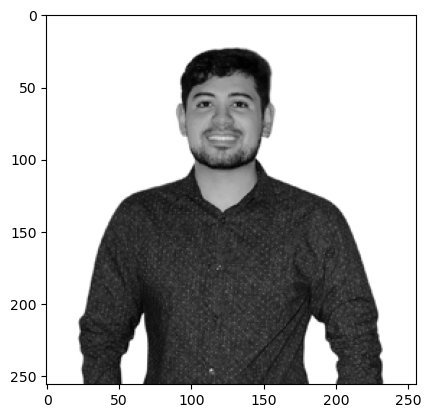

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import numpy as np

# Load the image and display it
# imgyo = mpimg.imread('Foto.jpg')
imgyo=image_convert('Foto.jpg','','')
plt.imshow(imgyo, cmap='gray')
imgyo.shape

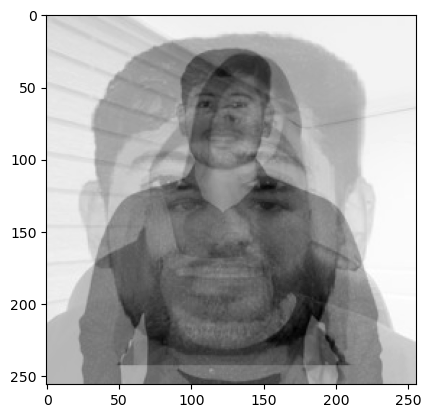

In [73]:
import matplotlib.pyplot as plt



# Define the folder where the images are located
Originalfolder  = 'C:\\Users\\acdzapata\\Documents\\Personal\\Especialización\\ML 2\\imagenes'
FinalFolder = 'C:\\Users\\acdzapata\\Documents\\Personal\\Especialización\\ML 2\\imagenes2'

# Load all the images into an array
images = []
for filename in os.listdir(Originalfolder):
    img=image_convert(filename,Originalfolder,FinalFolder)
    plt.imshow(img)
    images.append(img)


# Calculate the average image
avg_img = np.mean(images, axis=0)

# Display the average image
plt.imshow(avg_img, cmap='gray')
plt.show()

In [4]:
# Calculate the Euclidean distance between your face and the average face
distance = np.linalg.norm(imgyo - avg_img)

#np.linalg.norm() calculates the norm of a givn vector or matrix.Remember 
#that the norm is a mathematical concept that measures the "size" or "magnitude" of a vector or matrix.

print(f'The distance between your face and the average face is {distance:.2f}')

The distance between your face and the average face is 13196.55


In [5]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from oauth2client.service_account import ServiceAccountCredentials

# # Configuración de la autenticación con la API de Google Drive
# gauth = GoogleAuth()
# scope = ['https://www.googleapis.com/auth/drive']
# creds = ServiceAccountCredentials.from_json_keyfile_name('C:\\Users\\acdzapata\\Documents\\Personal\\Especialización\\ML 2\\KeyApiDrive.json', scope)
# gauth.credentials = creds
# drive = GoogleDrive(gauth)


## Let’s create the unsupervised Python package

In [6]:
import numpy as np

class PCA:
    def __init__(self, n_components, method = "eigen"):
        
        self.n_components = n_components
        self.method = method
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        self.transform(X)
        
    def transform(self, X):
        X = X - self.mean
        
        if self.method == "svd":
            U, s, Vt = np.linalg.svd(X)
            if self.n_components is not None:
                U = U[:, :self.n_components]
                s = s[:self.n_components]
                Vt = Vt[:self.n_components, :]
            self.components = Vt[:self.n_components].T
          
        elif self.method == "eigen":
            # Calculate the covariance matrix of X
            cov_X = np.cov(X, rowvar=False)
            # Calculate the eigenvalues and eigenvectors of the covariance matrix
            eigvals, eigvecs = np.linalg.eigh(cov_X)
            # Sort the eigenvectors by descending eigenvalues
            idx = np.argsort(eigvals)[::-1]
            eigvals = eigvals[idx]
            eigvecs = eigvecs[:, idx]
            
            # store the first n_components eigenvectors as the principal components
            self.components = eigvecs[:, : self.n_components]
    
    def fit_transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed


In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


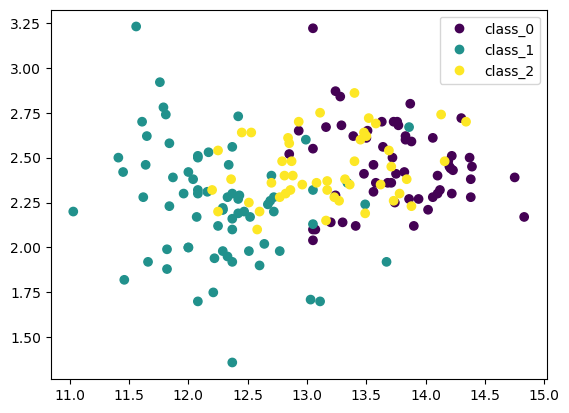

In [8]:
plot = plt.scatter(X[:,0], X[:,2], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

In [9]:
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data
pca.fit(X)

# transform the data using the PCA object
X_transformed = pca.fit_transform(X)

print(X_transformed.shape)

(178, 2)


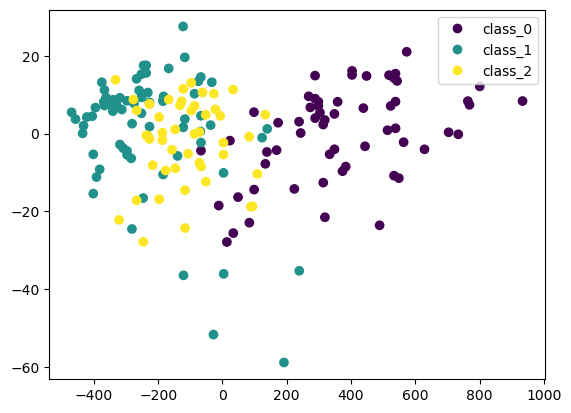

In [10]:
plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

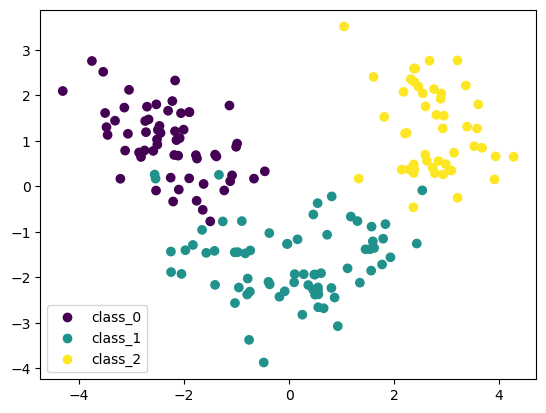

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.fit_transform(X)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed = pca.fit_transform(X_normalised)


plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

In [12]:
imgyo.shape

(256, 256)

In [15]:
# create a PCA object with 2 components
pca = PCA(n_components=100,method="svd")
# fit the data
pca.fit(imgyo)

# transform the data using the PCA object
imgyoreinvented = pca.fit_transform(imgyo)

print(imgyoreinvented.shape)

(256, 100)


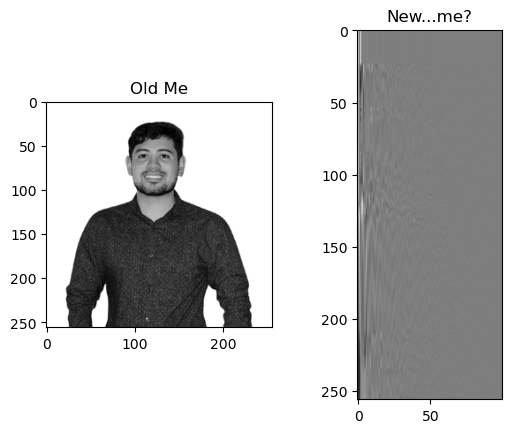

In [16]:

plt.subplot(121)
plt.imshow(imgyo, cmap='gray')
plt.title('Old Me')

plt.subplot(122)
plt.imshow(imgyoreinvented, cmap='gray')
plt.title('New...me?')

plt.show()


## Punto 5 y 6

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
mnist = fetch_openml('mnist_784')

In [19]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
mask = np.logical_or(y == 0, y == 8)
X = X[mask]
y = y[mask]


In [20]:
X /= 255.0

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_test

In [22]:
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)

C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='saga')

In [23]:
# Load the image and convert it to grayscale
img = Image.open('ocho.jpeg').convert('L')
img = img.resize((28, 28))
img = np.array(img).astype('float32') / 255.0
pred = model.predict(img.reshape(1, 784))

print('Predecilo pues:', pred[0])

Predecilo pues: 8


C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
accuracy = model.score(X_test, y_test)
print('Test accuracy: %.2f%%' % (accuracy * 100))


Test accuracy: 99.45%


#### MNIST PCA eigen

In [25]:
# create a PCA object with 2 components
pca = PCA(n_components=2)
X_eigen= X.copy()
# fit the data
pca.fit(X_eigen)

# transform the data using the PCA object
X_transformed_eigen = pca.fit_transform(X_eigen)

print(X_transformed_eigen.shape)

(13728, 2)


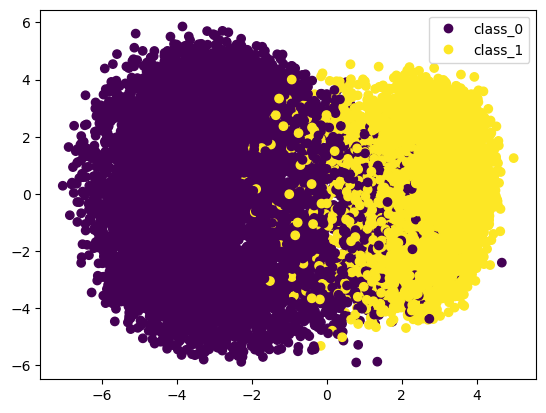

In [26]:
plot = plt.scatter(X_transformed_eigen[:,0], X_transformed_eigen[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

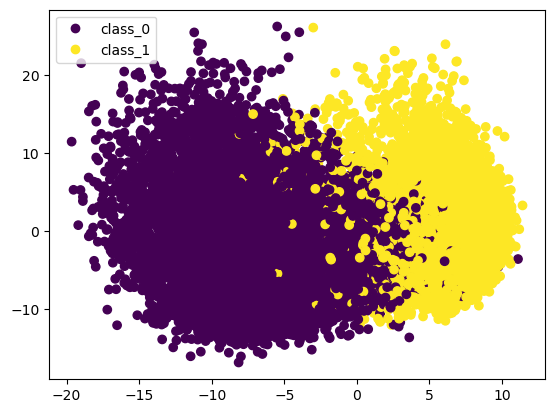

In [27]:
# Normalise the data
scaler = StandardScaler()
scaler.fit(X_eigen)
X_normalised = scaler.fit_transform(X_eigen)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed_eigen = pca.fit_transform(X_normalised)


plot = plt.scatter(X_transformed_eigen[:,0], X_transformed_eigen[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_eigen, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - eigen : %.2f%%' % (accuracy * 100))


Test accuracy PCA - eigen : 99.42%


C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### PCA MNIST SVA

In [29]:
# create a PCA object with 2 components
pca = PCA(n_components=2,method="svd")
X_svd= X.copy()
# fit the data
pca.fit(X_svd)

# transform the data using the PCA object
X_transformed_svd = pca.fit_transform(X_svd)

print(X_transformed_svd.shape)

(13728, 2)


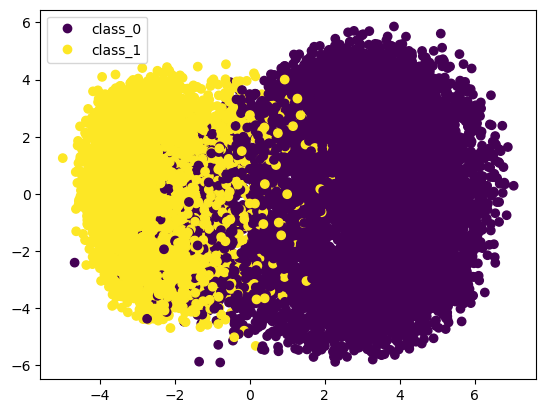

In [30]:
plot = plt.scatter(X_transformed_svd[:,0], X_transformed_svd[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

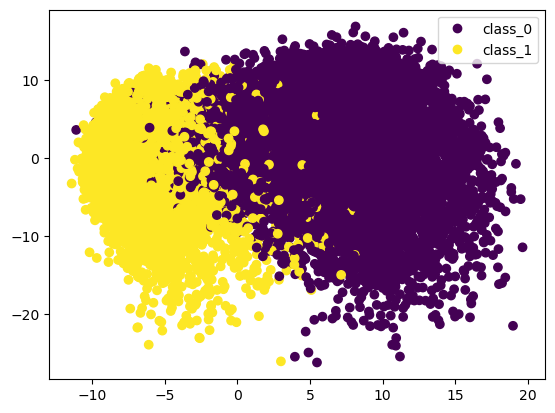

In [31]:
# Normalise the data
scaler = StandardScaler()
scaler.fit(X_svd)
X_normalised = scaler.fit_transform(X_svd)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed_svd = pca.fit_transform(X_normalised)


plot = plt.scatter(X_transformed_svd[:,0], X_transformed_svd[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - svd : %.2f%%' % (accuracy * 100))

Test accuracy PCA - eigen : 99.42%


C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different
are these results from those of your implementation? Why?

In [55]:
from sklearn.decomposition import PCA

In [60]:
# crea un objeto PCA y ajusta los datos SVD
pca = PCA(n_components=2, svd_solver='full')
X_pca_sl= X.copy()
# X_pca_sl = pca.fit_transform(X_pca_sl)

X_transformed_pca = pca.fit_transform(X_pca_sl)

print(X_transformed_pca.shape)

(13728, 2)


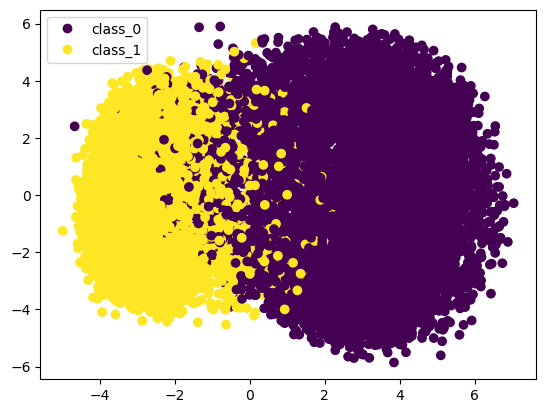

In [69]:
plot = plt.scatter(X_transformed_pca[:,0], X_transformed_pca[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

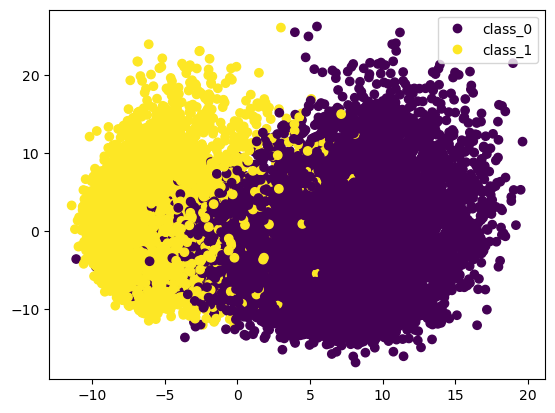

In [70]:
# Normalise the data
scaler = StandardScaler()
scaler.fit(X_pca_sl)
X_normalised_pca_sl= scaler.fit_transform(X_pca_sl)

# scaler.fit(y.reshape(-1, 1))
# y_normalised_pca_sl= scaler.fit_transform(y.reshape(-1, 1))

# Apply PCA now
pca.fit(X_normalised_pca_sl)

# transform the data using the PCA object
X_transformed_pca_sl = pca.fit_transform(X_normalised_pca_sl)


plot = plt.scatter(X_transformed_pca_sl[:,0], X_transformed_pca_sl[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_sl, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - sklearn : %.2f%%' % (accuracy * 100))

Test accuracy PCA - sklearn : 99.45%


C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
# crea un objeto PCA y ajusta los datos
pca = PCA(n_components=2, svd_solver='randomized')
X_pca_sl_eigen= X.copy()
X_pca_sl_eigen = pca.fit_transform(X_pca_sl_eigen)

X_transformed_pca = pca.fit_transform(X_pca_sl_eigen)

print(X_transformed_pca.shape)

(13728, 2)


In [4]:
img_vectorizada

array([255., 255., 255., ..., 255., 255., 255.])

In [15]:
img_gris.shape

(800, 800)

In [ ]:
from sklearn.decomposition import PCA

# Crea un objeto PCA con el número deseado de componentes
pca = PCA(n_components=50)

# Ajusta el objeto PCA al conjunto de datos X
pca.fit(X)

# Transforma el conjunto de datos X a su representación de menor dimensión
X_transformed = pca.transform(X)